In [1]:
import tensorflow as tf
from swin_model import *
from convnext_model import *
from dataset import *
import os
import cv2
import matplotlib.pyplot as plt
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
partition_layer = PatchPartition()
input_tensor = tf.random.uniform(shape=(1,224, 224, 3))
output_tensor = partition_layer(input_tensor)
output_tensor.shape # (1, (H/4 * W/4), (4 * 4 * 3)), for patch size = 4

TensorShape([1, 3136, 48])

In [3]:
embedding_layer = PatchEmbedding()
output_tensor = embedding_layer(output_tensor)
output_tensor.shape # (1, (H/4 * W/4), C)

TensorShape([1, 3136, 96])

In [4]:
merging_layer = PatchMerging((56, 56), 96)
output_tensor = merging_layer(output_tensor)
output_tensor.shape # (1, (H/8, W/8), 2C)

TensorShape([1, 784, 192])

In [5]:
wmsa = WindowAttention(192, (7, 7), 6)
new_tensor = tf.random.uniform((64, 49, 192))
new_output_tensor = wmsa(new_tensor)
new_output_tensor.shape

TensorShape([64, 49, 192])

In [6]:
tb = TransformerBlock(192, (28, 28), 6)
output_tensor = tb(output_tensor)
output_tensor.shape

TensorShape([1, 784, 192])

In [7]:
model = SwinTransformer(10)
image_input = tf.random.uniform((16, 224, 224, 3))
model = SwinTransformer(10)
out = model(image_input)
out.shape

TensorShape([16, 10])

In [8]:
conv_block = ConvNeXTBlock(96)
inpt = tf.random.uniform((16, 56, 56, 96))
outpt = conv_block(inpt)
outpt.shape

TensorShape([16, 56, 56, 96])

In [9]:
inputs = tf.random.uniform((16, 224, 224, 3))
model = ConvNeXT(10)
out = model(inputs)
out.shape

TensorShape([16, 10])

In [2]:
annotations = get_annotations(os.path.join(os.getcwd(), 'data/Annotations/'))
annotations[0]

{'filename': '2007_000027.jpg',
 'class': 'person',
 'bbox': [174, 101, 349, 351]}

In [3]:
train, test = split_data(annotations, 0.7)
len(train), len(test)

(6276, 2690)

In [4]:
data_gen = DataGenerator(train)
for img, label in data_gen:
    print(label)
    break

[[[0, 219, 180, 254, 240]], [[0, 140, 63, 500, 500]], [[10, 18, 73, 486, 302]], [[13, 174, 118, 383, 245]], [[0, 17, 90, 173, 375]], [[2, 2, 18, 500, 483]], [[0, 171, 46, 323, 301]], [[0, 43, 1, 375, 492]], [[18, 126, 105, 500, 343]], [[5, 1, 1, 307, 453]], [[0, 118, 42, 188, 181]], [[0, 124, 110, 252, 375]], [[0, 254, 266, 301, 338]], [[0, 225, 107, 346, 336]], [[0, 78, 182, 107, 238]], [[13, 264, 110, 404, 201]], [[2, 1, 88, 251, 409]], [[0, 377, 190, 471, 355]], [[0, 140, 64, 366, 375]], [[7, 188, 85, 302, 211]], [[0, 60, 96, 243, 500]], [[1, 72, 25, 469, 485]], [[1, 88, 72, 263, 238]], [[0, 1, 1, 194, 500]], [[9, 259, 206, 500, 333]], [[11, 1, 1, 500, 375]], [[0, 203, 33, 279, 230]], [[9, 73, 2, 465, 244]], [[0, 95, 5, 310, 381]], [[0, 180, 75, 235, 194]], [[18, 1, 152, 182, 370]], [[1, 126, 133, 400, 263]], [[2, 157, 89, 286, 206]], [[0, 153, 170, 307, 364]], [[4, 118, 24, 398, 375]], [[1, 82, 219, 287, 318]], [[0, 79, 41, 290, 500]], [[0, 69, 38, 321, 500]], [[4, 102, 25, 441, 32

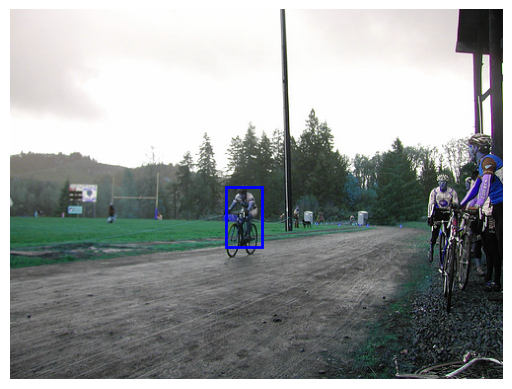

In [5]:
img = cv2.imread(os.path.join(os.getcwd(), 'data/JPEGImages/', train[0]['filename']))
plt.imshow(img)
axis = plt.gca()
coords = (train[0]['bbox'][0], train[0]['bbox'][1]), train[0]['bbox'][2] - train[0]['bbox'][0] + 1, train[0]['bbox'][3] - train[0]['bbox'][1] + 1
axis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='blue', linewidth=2))
plt.axis('off');